<a href="https://colab.research.google.com/github/sashamadkaikar/Credit-Card-Fraud-Detection-/blob/main/Credit_card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
#loading the data set to pandas
cc_data=pd.read_csv('/content/creditcard.csv')


In [ ]:
#print foirst 5 rows
cc_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#dataset info
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
#checking number of missing values in each column
cc_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
#distribution of legit transaction and fradulant transaction
cc_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

This dataset is highly unbalanced


0-->Normal Transaction

1-->Fradulent Transacion

In [ ]:
#seperating the data for analysis
legit=cc_data[cc_data.Class==0]
fraud=cc_data[cc_data.Class==1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [ ]:
#statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
#compare the values for both the transactions
cc_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Undersampling


In [ ]:
legit_sample=legit.sample(n=492)

Concatenating equal number of normal and fradulent samples


In [ ]:
new_dataset= pd.concat([legit_sample,fraud],axis=0)

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
15704,27137.0,-1.209050,1.527267,1.061606,0.463215,0.096887,-0.604059,0.646712,0.003650,-0.389003,...,0.149016,0.568405,-0.058020,0.430933,0.211875,-0.416391,-0.493628,-0.221855,1.50,0
202727,134462.0,2.286333,-1.173190,-2.189036,-1.760547,-0.364721,-0.994091,-0.324877,-0.345976,-2.171763,...,0.046129,0.443626,0.032819,0.701921,0.268320,0.031138,-0.069782,-0.076536,42.00,0
194985,130851.0,0.453706,-0.333948,-0.776505,0.446312,-0.021049,-0.126509,0.278168,-1.031148,-1.595237,...,0.678183,-0.408247,-0.332173,-0.542151,0.361094,-0.374681,0.254313,0.326765,199.47,0
200433,133433.0,2.203537,-0.786342,-1.375955,-0.864971,-0.438349,-0.849532,-0.388876,-0.237891,-0.243588,...,-0.043318,-0.145852,0.258724,0.718305,-0.074524,-0.359563,-0.042560,-0.053828,21.00,0
84563,60364.0,1.122093,-1.097350,-1.685746,-1.430661,1.487218,3.236168,-0.817920,0.756838,-0.780758,...,-0.032724,-0.598938,-0.194005,0.938517,0.575821,-0.303710,-0.006939,0.060355,178.75,0


In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [ ]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,96534.217480,0.010492,-0.067481,-0.053558,0.075129,0.006789,-0.020203,0.088572,0.030087,-0.038956,...,-0.005908,-0.014652,-0.000320,0.066748,0.02270,0.014456,0.002816,0.017442,-0.016184,100.889207
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.10513,0.041449,0.051648,0.170575,0.075667,122.211321


Splitting the data into features and target

In [ ]:
# here we use x to store all attribute values whereas y to store the class attribute
x=new_dataset.drop(columns='Class',axis=1)
y=new_dataset['Class']

In [ ]:
print(x)

            Time        V1        V2        V3        V4        V5        V6  \
15704    27137.0 -1.209050  1.527267  1.061606  0.463215  0.096887 -0.604059   
202727  134462.0  2.286333 -1.173190 -2.189036 -1.760547 -0.364721 -0.994091   
194985  130851.0  0.453706 -0.333948 -0.776505  0.446312 -0.021049 -0.126509   
200433  133433.0  2.203537 -0.786342 -1.375955 -0.864971 -0.438349 -0.849532   
84563    60364.0  1.122093 -1.097350 -1.685746 -1.430661  1.487218  3.236168   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [ ]:
print(y)

15704     0
202727    0
194985    0
200433    0
84563     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64



split data into training data and testing data
thus here we use the train test split libraryfunctions which we imported


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,stratify=y,random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape,y.shape,y_train.shape,y_test.shape)

(984, 30) (787, 30) (197, 30) (984,) (787,) (197,)


model training :here since it is a binary classificationwe are using a logistic regression mode but we can use any model which gives us maximum accuracy

Logistic Regression

In [ ]:
model=LogisticRegression()

In [ ]:
#training the logistic Regression Model with Traing Data
model.fit(x_train,y_train)

LogisticRegression()

Model Evaluation

Accuracy score


In [ ]:
#accuracy on training data

x_train_prediction=model.predict(x_train)
training_accuracy=accuracy_score(x_train_prediction,y_train)

In [ ]:
print('Accuracy on training : ',training_accuracy)

Accuracy on training :  0.9224904701397713


In [ ]:
#accuracy on test data
x_test_prediction=model.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)

In [ ]:
print('Accuracy on test data : ',test_data_accuracy)

Accuracy on test data :  0.9187817258883249


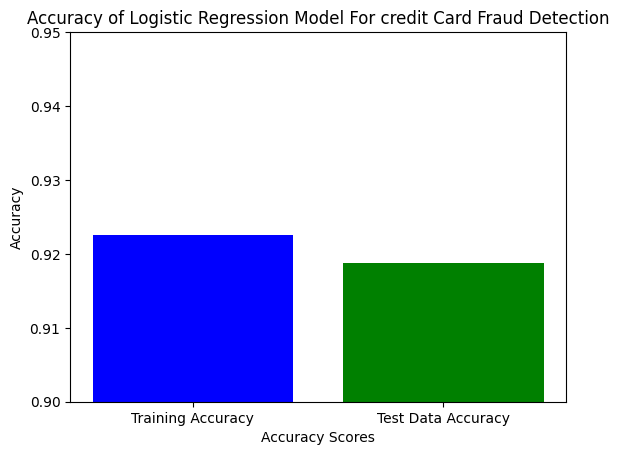

In [ ]:
import matplotlib.pyplot as plt

# Plotting the accuracy scores
labels = ['Training Accuracy', 'Test Data Accuracy']
accuracy_scores = [training_accuracy, test_data_accuracy]

plt.bar(labels, accuracy_scores, color=['blue', 'green'])
plt.xlabel('Accuracy Scores')
plt.ylabel('Accuracy')
plt.title('Accuracy of Logistic Regression Model For credit Card Fraud Detection')
plt.ylim(0.9, 0.95) # Set y-axis limits for better visualization
plt.show()
